In this notebook, I'll look into the food type data, and create clean csv files:

The columns we're dealing with in this notebook are:
- food_type_halal
- food_type_kosher
- food_type_vegan_vegetarian
- food_type_medical_condition
- food_type_allergen_free
- food_type_country
- food_type_not_special
- food_type_prefer_not_to_answer
- food_type_other

In [36]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import data
df = pd.read_csv('original_food_type_data.csv')

In [3]:
# overview data
df.describe(include = 'all')

,participant_ID,food_type_halal,food_type_kosher,food_type_vegan_vegetarian,food_type_medical_condition,food_type_allergen_free,food_type_country,food_type_not_special,food_type_prefer_not_to_answer,food_type_other
count,4054,913,387,1050,783,633,709,1311,157,153
unique,4054,1,1,1,1,1,1,1,1,130
top,ns 757,halal,kosher,vegan or vegetarian,food for medical conditions,allergen-free foods,country food,no special food,prefer not to answer,arabic food
freq,1,913,387,1050,783,633,709,1311,157,6


checking out unique values in the other column:

In [4]:
df.food_type_other.unique()

array(['need constant probiotics in my diet kiefer, yogurt',
       'more fresh vegetables and meat, fresh vs frozen', nan,
       'i donâ€™t have any', 'lactose free', 'high proteins',
       'kid friendly', 'gluten free', 'lactose free foods',
       'fresh fruit and vegetables',
       'soft foods/foods that can be eaten for someone with difficulty or an inability to chew/difficulty swallowing, hearty soup products (chunky/heavy soups that are not simple chicken noodle soup or only broth options)',
       'meat', 'food (esp bread) that has nutrition label',
       'school snacks for kids', 'lactose', 'indian food', 'canadian',
       'usually eat more fresh produce',
       'high fibre foods,vegetables,tuna,salmon,chicken,eggs and nuts and beans',
       'celiac lactose intolerant', 'and organic', 'boost or ensure',
       'more vegetables canned or frozen', 'protein', 'thank you',
       'lactose/dairy free',
       'gluten free, lactose free products for my kids',
       'fruit, v

In [5]:
match_words = {'allergen-free foods': ['free','lactose', 'soy', 'seeds', 'starch', 'sensitivety'] ,
               'country food' : ['arabic', 'african', 'asian', 'exotic', 'indian','burundian', 'canadian','indigenous', 'caribbean/african'],
               'vegan or vegetarian' : ['vegetarian'],
               'food for medical conditions' : ['diabetes', 'diet', 'acidic', 'salt', ' medical', 'inability', 'special', 'chew', 'inflammation'],
               'fresh vegetables and fruits' : ['veggies', 'vegetables', 'corn', 'fruits', 'fiber', 'plantain', 'tubers','cauliflower','potatoes'],
               'proteins or meat' : ['meat', 'ham', 'turkey', 'sea', 'fish','chicken', 'eggs', 'tuna', 'protein', 'beans', 'steak', 'duck'],
               'baby and child': ['pediasure', 'son', 'daughter','teeth','kid', 'baby', 'snack', 'lunch'],
               'dairy products and probiotics' : ['cheese','milk', 'yogurt'],
               'healthy or organic food' :  ['fresh', 'healthy', 'taste','less', 'more', 'non processed', 'whole', 'organic', 'minimal', 'non gmo','label'],
               'halal' : ['halal','no pork', "don't eat pork"],
               'no special food' : ['none', 'no special food', 'food', 'thank', 'know', 'any','customer' ],
               'canned food' : ['canned', 'soup'],
               'pre-prepared food' : ['pre-prepared'],
               'pet' : ['pet', 'dog', 'cat'],
               'recipes and tips': ['tips'],
               'oil': ['oil'],
               'less carbohydrates': ['pasta', 'sugar', 'carbs'],
               'desserts': ['chocolate', 'desserts'],
               'prefer not to answer' : ['prefer not to answer'],
               'soft' : ['teeth', 'soft', 'chew'],
               'nutritional supplements' : ['boost', 'ensure']
               
                    }

In [6]:
# Now, I'll create columns which don't already exist in the original dataframe:
df[['food_type_meat/ proteins', 'food_type_child/ baby', 'food_type_desserts', 
    'food_type_less_carbohydrates', 'food_type_pre-prepared', 'food_type_pet', 'food_type_oil', 'food_type_canned',
    'food_type_healthy', 'food_type_dairy', 'food_type_soft', 'food_type_nutritional_supplements', 'food_type_recipes/ tips', 'food_type_fresh']] = None

In [7]:
# Function to classify answers based on keywords
def classify_food(answer, keywords):
    
    if isinstance(answer, str):
        answer_lower = answer.lower()
        matched_options = []
        
        answer_lower = answer_lower.strip().lstrip()
        
        if answer_lower == 'p':
            answer_lower = 'prefer not to answer'
        
        elif answer_lower == 'no':
            answer_lower = 'none'
            
        for option, keywords in keywords.items():
            if any(keyword in answer_lower for keyword in keywords):
                if option not in matched_options:
                    matched_options.append(option)
        
        terms = ['prefer not to answer', 'no special food']
    
        for term in terms:
         
            if  term in matched_options:
                if len(matched_options) > 1:
                    matched_options.remove(term)
        return '; '.join(matched_options) if matched_options else answer
    
    elif type(answer) == float:
        return answer
       
    return

In [8]:
# Apply the function to map each answer to provided options
df['mapped_food'] = df['food_type_other'].apply(lambda x: classify_food(x, match_words))

In [9]:
df.describe(include= 'all')

,participant_ID,food_type_halal,food_type_kosher,food_type_vegan_vegetarian,food_type_medical_condition,food_type_allergen_free,food_type_country,food_type_not_special,food_type_prefer_not_to_answer,food_type_other,...,food_type_pet,food_type_oil,food_type_canned,food_type_healthy,food_type_dairy,food_type_soft,food_type_nutritional_supplements,food_type_recipes/ tips,food_type_fresh,mapped_food
count,4054,913,387,1050,783,633,709,1311,157,153,...,0,0,0,0,0,0,0,0,0,153
unique,4054,1,1,1,1,1,1,1,1,130,...,0,0,0,0,0,0,0,0,0,45
top,ns 757,halal,kosher,vegan or vegetarian,food for medical conditions,allergen-free foods,country food,no special food,prefer not to answer,arabic food,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,healthy or organic food
freq,1,913,387,1050,783,633,709,1311,157,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19


In [10]:
# info:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4054 entries, 0 to 4053
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   participant_ID                     4054 non-null   object
 1   food_type_halal                    913 non-null    object
 2   food_type_kosher                   387 non-null    object
 3   food_type_vegan_vegetarian         1050 non-null   object
 4   food_type_medical_condition        783 non-null    object
 5   food_type_allergen_free            633 non-null    object
 6   food_type_country                  709 non-null    object
 7   food_type_not_special              1311 non-null   object
 8   food_type_prefer_not_to_answer     157 non-null    object
 9   food_type_other                    153 non-null    object
 10  food_type_meat/ proteins           0 non-null      object
 11  food_type_child/ baby              0 non-null      object
 12  food_t

In [11]:
#Now we can drop the  other column:
df.drop('food_type_other', axis = 1, inplace = True)

In [12]:
# create a function to consolidate the data:
def consolidate_row(row):
    """ 
    Consolidate answers from a DataFrame row, excluding the first and last columns.

    This function processes a row from a DataFrame to:
    1. Create a list of consolidated answers from specified columns, excluding the "participant_ID" (first column) and the last column.
       - Only non-null and non-empty values are included in the list.
    2. Count the number of answers provided.
    3. If the consolidated list contains "prefer not to answer", the list is updated to contain only this value.
    4. Return the consolidated answers as a single string and the count of answers.

    Parameters:
    row (pd.Series): A row from a DataFrame containing answers to be consolidated.

    Returns:
    tuple: A tuple containing:
           - A string of consolidated answers, joined by '; '.
           - An integer count of the number of answers provided.
    """
        
    consolidated = []
    
    # Loop through the specified columns excluding the "participant_ID" :
    for value in row.iloc[1:]:
        
        if pd.notna(value)  and value != '':
            values = value.split(';')
            for value in values:
                if value not in consolidated:
                    consolidated.append(value)
    
    if len(consolidated) == 0:
        consolidated_answer = 'prefer not to answer'
        number_of_answers = 0
    
    else:
        consolidated_answer = ';'.join(consolidated)
    
        # finding out how many answers were provided:
        number_of_answers = len(consolidated_answer.split(';'))
            
   
        terms = ['prefer not to answer', 'no special food']
    
        for term in terms:
            if  term in consolidated:
                if number_of_answers > 1:
                    consolidated.remove(term)
                    number_of_answers = len(consolidated)
        
        consolidated_answer = ';'.join(consolidated)
    
            
    
    return consolidated_answer, number_of_answers

In [13]:
# Apply the consolidate_row function to each row and create new columns:
df[['food_type_consolidated', 'number_of_food_types']] = df.apply(
        lambda row: pd.Series(consolidate_row(row)), axis=1 )

In [14]:
df.describe(include = 'all')

,participant_ID,food_type_halal,food_type_kosher,food_type_vegan_vegetarian,food_type_medical_condition,food_type_allergen_free,food_type_country,food_type_not_special,food_type_prefer_not_to_answer,food_type_meat/ proteins,...,food_type_canned,food_type_healthy,food_type_dairy,food_type_soft,food_type_nutritional_supplements,food_type_recipes/ tips,food_type_fresh,mapped_food,food_type_consolidated,number_of_food_types
count,4054,913,387,1050,783,633,709,1311,157,0,...,0,0,0,0,0,0,0,153,4054,4054.000000
unique,4054,1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,45,125,NaN
top,ns 757,halal,kosher,vegan or vegetarian,food for medical conditions,allergen-free foods,country food,no special food,prefer not to answer,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,healthy or organic food,no special food,NaN
freq,1,913,387,1050,783,633,709,1311,157,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19,1166,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.473853
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.925917
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000


In [15]:
# Since all mapped food types are in the consolidated column, i'll drop the mapped column:
df.drop('mapped_food', axis = 1, inplace = True)

In [16]:
df.columns

Index(['participant_ID', 'food_type_halal', 'food_type_kosher',
       'food_type_vegan_vegetarian', 'food_type_medical_condition',
       'food_type_allergen_free', 'food_type_country', 'food_type_not_special',
       'food_type_prefer_not_to_answer', 'food_type_meat/ proteins',
       'food_type_child/ baby', 'food_type_desserts',
       'food_type_less_carbohydrates', 'food_type_pre-prepared',
       'food_type_pet', 'food_type_oil', 'food_type_canned',
       'food_type_healthy', 'food_type_dairy', 'food_type_soft',
       'food_type_nutritional_supplements', 'food_type_recipes/ tips',
       'food_type_fresh', 'food_type_consolidated', 'number_of_food_types'],
      dtype='object')

In [17]:
# first, I'll set all values in the desired columns to 0
df.iloc[:, 1:-2] = 0

In [18]:
df.columns[8]

'food_type_prefer_not_to_answer'

In [19]:
# Now, I am going to replace the values in each column: 1 is indicated in the column that matches any of the consoldiated value:
for x in df.index:
    values = df.food_type_consolidated.iloc[x].split(';')
    
    dictionary_words = {'halal': df.columns[1],
                     'kosher' : df.columns[2],
                     'vegetarian' : df.columns[3],
                     'medical' : df.columns[4],
                     'allergen' : df.columns[5],
                     'country' : df.columns[6],
                     'no special food': df.columns[7],
                     'prefer' : df.columns[8],
                     'meat' : df.columns[9],
                     'child': df.columns[10],
                     'desserts': df.columns[11],
                     'less carbohydrates' : df.columns[12],
                     'pre-prepared' : df.columns[13],
                    'pet' : df.columns[14],
                    'oil' : df.columns[15],
                    'canned': df.columns[16],
                    'healthy': df.columns[17],
                    'dairy' : df.columns[18],
                    'soft' : df.columns[19],
                    'nutritional' : df.columns[20],
                    'recipes' : df.columns[21],
                    'fresh' : df.columns[22]
                     }
    
    # ensuring when 'prefer not to answer' is the answer, we only get 1 in that column.
    if 'prefer not to answer' in values:
        df.iloc[x, 8] = 1

    
    # filling in 1 in matching columns:
    else:
        for value in values:
                        
            for key in dictionary_words.keys():
                if key in value:
                    column = dictionary_words[key]
                    df.loc[x, [column]] = 1
    
    # setting up the answer to "fresh" to 1, if 'healthy' chosen.
    if df.iloc[x, 17] == 1:
        df.iloc[x, 22] = 1

In [20]:
df.describe(include = 'all')

,participant_ID,food_type_halal,food_type_kosher,food_type_vegan_vegetarian,food_type_medical_condition,food_type_allergen_free,food_type_country,food_type_not_special,food_type_prefer_not_to_answer,food_type_meat/ proteins,...,food_type_oil,food_type_canned,food_type_healthy,food_type_dairy,food_type_soft,food_type_nutritional_supplements,food_type_recipes/ tips,food_type_fresh,food_type_consolidated,number_of_food_types
count,4054,4054.0,4054.0,4054.0,4054.0,4054.0,4054.0,4054.0,4054.0,4054.0,...,4054.0,4054.0,4054.0,4054.0,4054.0,4054.0,4054.0,4054.0,4054,4054.000000
unique,4054,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,125,NaN
top,ns 757,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,no special food,NaN
freq,1,3138.0,3667.0,3004.0,3264.0,3404.0,3331.0,2888.0,3880.0,4021.0,...,4050.0,4051.0,4009.0,4047.0,4051.0,4053.0,4053.0,3994.0,1166,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.473853
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.925917
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4054 entries, 0 to 4053
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   participant_ID                     4054 non-null   object
 1   food_type_halal                    4054 non-null   object
 2   food_type_kosher                   4054 non-null   object
 3   food_type_vegan_vegetarian         4054 non-null   object
 4   food_type_medical_condition        4054 non-null   object
 5   food_type_allergen_free            4054 non-null   object
 6   food_type_country                  4054 non-null   object
 7   food_type_not_special              4054 non-null   object
 8   food_type_prefer_not_to_answer     4054 non-null   object
 9   food_type_meat/ proteins           4054 non-null   object
 10  food_type_child/ baby              4054 non-null   object
 11  food_type_desserts                 4054 non-null   object
 12  food_t

Now, I'll create bins for number of diseases:

In [22]:
# I will create a summary where # of food types is categorized into more generic bins:
bins = {
    'prefer not to answer': df.food_type_prefer_not_to_answer == 1,
    'no special food': df.food_type_not_special == 1,
    'religious' : (df.food_type_halal == 1) | (df.food_type_kosher == 1),
    'ethnic' : df.food_type_country == 1,
    '1-2': (df.number_of_food_types == 1) | (df.number_of_food_types ==2),
    '3+': df.number_of_food_types >= 3,
}

In [23]:
# Create a new column in the DataFrame
df['food_bin'] = np.select(list(bins.values()),list(bins.keys()), default='unknown')

In [24]:
# save the dataframe as a csv file.
df.to_csv('NS_food_types_mapped_consolidated_binned.csv', index = False)

In [25]:
# create a quick summary:
overall_summary = df.iloc[:, -2:].groupby('food_bin').count().sort_values(by = 'number_of_food_types', ascending = False)

In [26]:
# view results:
overall_summary

,number_of_food_types
food_bin,
no special food,1166
religious,1150
1-2,1018
ethnic,478
prefer not to answer,174
3+,68


In [27]:
# changing the column name:
overall_summary.columns = ['total']

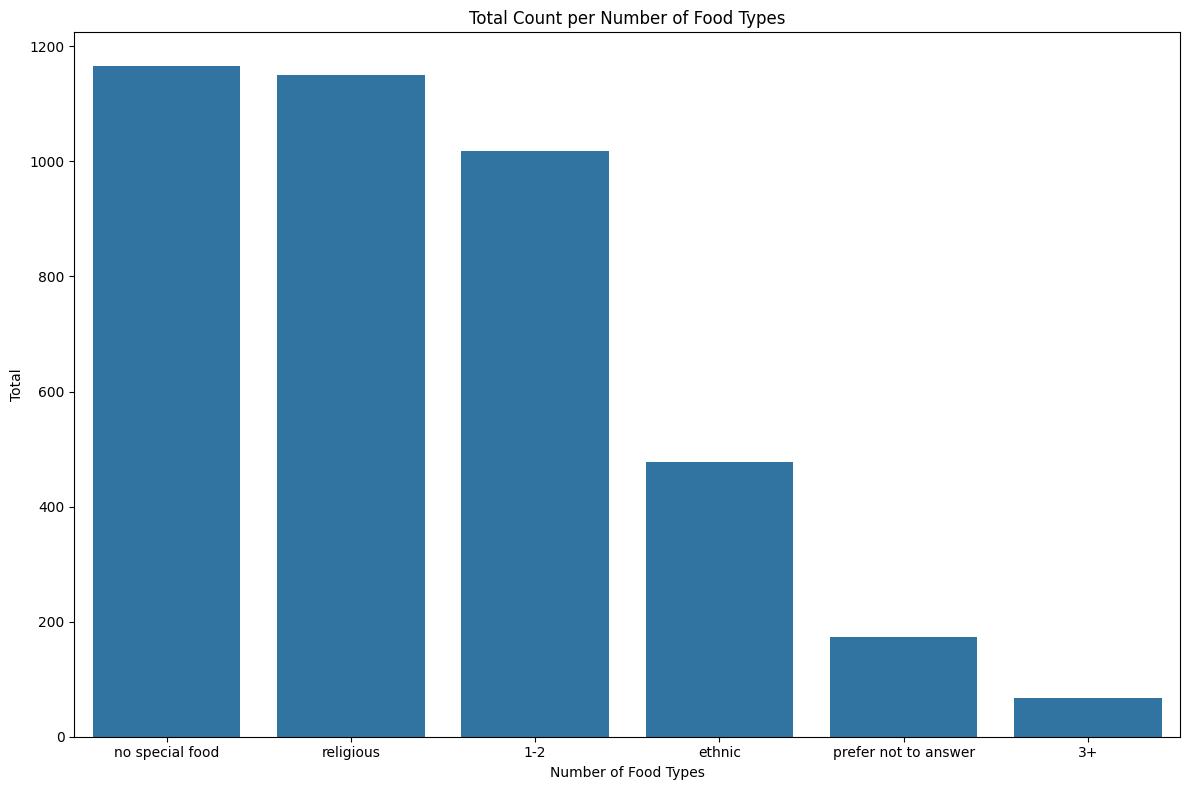

In [28]:
# plotting the overall_summary results:

plt.figure(figsize=(12, 8))
sns.barplot(
    data= overall_summary,
    x ='food_bin',
    y ='total',
    errorbar=None
)

#plt.xticks(rotation=90)
plt.xlabel('Number of Food Types')
plt.ylabel('Total')
plt.title('Total Count per Number of Food Types')


# Adjust layout to make room for the legend
plt.tight_layout()

# Save the figure
plt.savefig('food_types_number_summary.png', dpi=300, bbox_inches='tight')

# show figure
plt.show()

In [29]:
# save the above summary into a csv file:
overall_summary.to_csv('binned_food_types.csv')

In [30]:
# summary of categories counts in total without bins:
summary = {}
for column in df.columns[1:-3]:
    food_type = column.split('_')
    food_type = ' '.join(food_type[2:])
    
    if food_type == 'not special':
        food_type = 'no special food'
    
    summary.update({food_type: df[column].sum(axis = 0)})

In [31]:
# create dataframe:
df_summary = pd.DataFrame({'food type' : summary.keys(),
             'total' : summary.values()})

In [32]:
# sort data:
df_summary = df_summary.sort_values(by = 'total', ascending = False)

In [33]:
df_summary

,food type,total
6,no special food,1166
2,vegan vegetarian,1050
0,halal,916
3,medical condition,790
5,country,723
4,allergen free,650
1,kosher,387
7,prefer not to answer,174
21,fresh,60
16,healthy,45


In [34]:
# save the summary above into a csv file:
df_summary.to_csv('food_summary.csv', index = False)

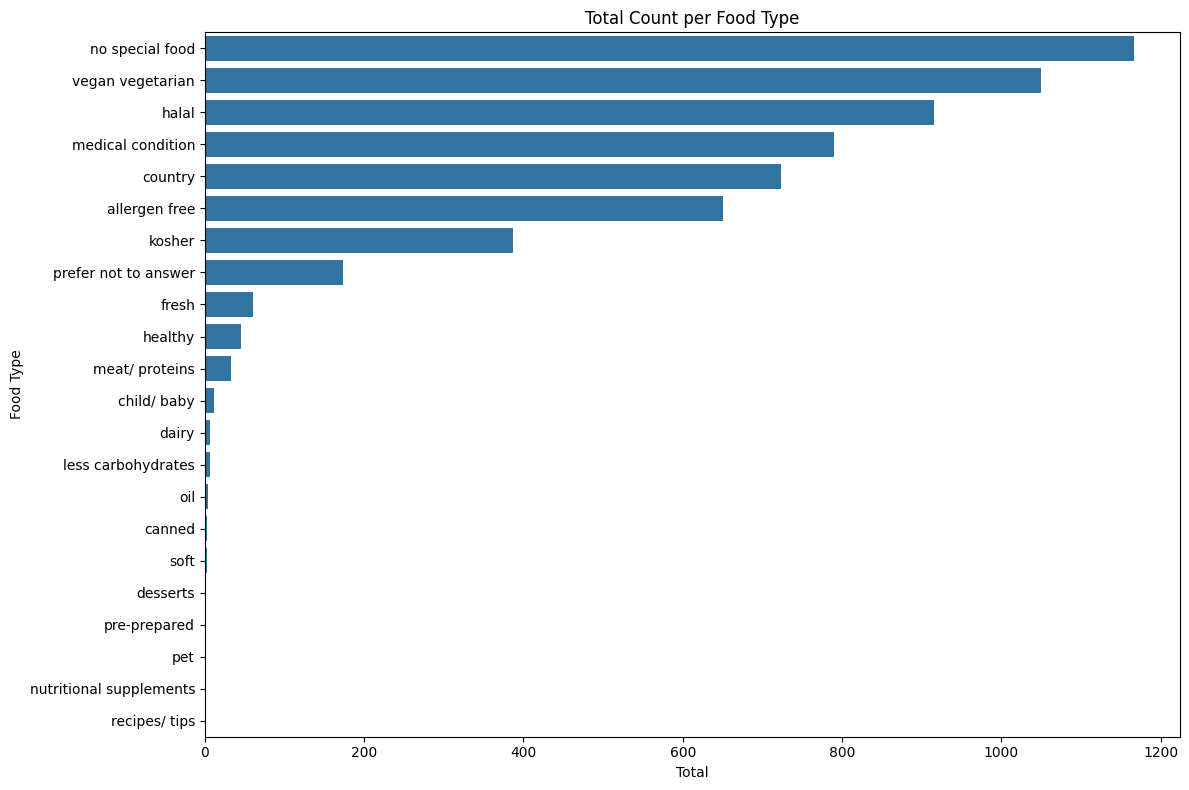

In [35]:
# plotting the df_summary results:
plt.figure(figsize=(12, 8))
sns.barplot(
    data= df_summary,
    y ='food type',
    x ='total',
    errorbar=None
)


plt.ylabel('Food Type')
plt.xlabel('Total')
plt.title('Total Count per Food Type')


# Adjust layout to make room for the legend
plt.tight_layout()

# Save the figure
plt.savefig('food_types_summary.png', dpi=300, bbox_inches='tight')

# show figure
plt.show()